In [2]:
##########################################################################################################
## This file computes the conductivity in a permeable Hele-Shaw cell using BJS BC (codedFixedValue)
##########################################################################################################
import csv
from pdb import set_trace as keyboard
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter
import matplotlib.patches as patches
# from pandas import DataFrame

In [3]:
# load the velocity 
velocity = open('./U')
vel = velocity.readlines()
ux = []
uy = []
uz = []
#  starting from line 22
# ii = 22
vnum_list = ['0','1','2','3','4','5','6','7','8','9','.','-','e']
for v in vel[22:10022]:
    i = 1
    ux_val = ''
    j = -3
    uz_val = ''
    while v[i] in vnum_list:
        ux_val += v[i]
        i += 1
    while v[j] in vnum_list:
        uz_val += v[j]
        j -= 1
    ux.append(float(ux_val))
    uz.append(float(uz_val[::-1]))

In [4]:
# load pressure gradient 
pressureGradient = open('./grad(p)')
pressGrad = pressureGradient.readlines()
dp = []
dpnum_list = ['0','1','2','3','4','5','6','7','8','9','.','-']
#  starting from line 22
i = 22
for dpre in pressGrad[22:10022]:
    j = 1
    dpval = ''
    while dpre[j] in dpnum_list:
        dpval += dpre[j]
        j += 1
    dp.append(float(dpval))


In [6]:
# load pressure
pressure = open('./p')
press = pressure.readlines()
p = []
#  starting from line 22
# i = 22
for pp in press[22:10022]:
    p.append(float(pp[:8]))

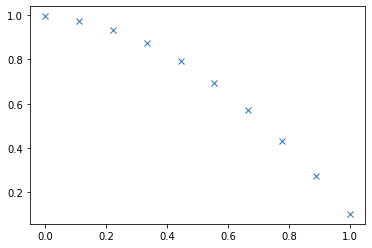

In [7]:
# check how velocity is listed in the files
iu = np.linspace(0,1,10)
plt.plot(iu, ux[0:10000:1000],'x')

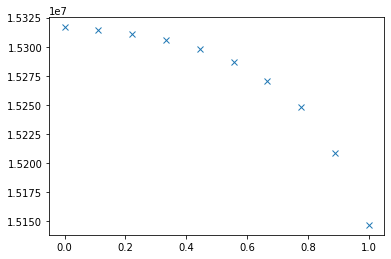

In [8]:
# check how pressure is listed in the files
ip = np.linspace(0,1,10)
plt.plot(ip, p[0:10000:1000] ,'x')

### Take away: pressure/velocity in the files are listed in the x-direction (from 0 to 100) first, and then reversed z-direction (from h to 0). Note that h varies with x.

In [11]:
# add coordinates: 1000 in x, 10 in z
ix = list(np.linspace(0,100,1000))*10  # x-coordinate
alpha = -0.0005
iz = [] # z-coordinate
hend = 1 + alpha * 100
h_in = np.linspace(0,1,10)[::-1]
h_end = np.linspace(0,hend,10)[::-1]
for i in range(10):
    iz += list(np.linspace(h_in[i],h_end[i],1000))

In [12]:
# create a data frame 
flow = {'x':ix,'z':iz,'ux': ux,'uz':uz,'grad(p)': dp,'pressure':p}
df = pd.DataFrame(flow, columns=['x','z','ux','uz','grad(p)','pressure'])
df.head(20) # show the first 20 rows

,x,z,ux,uz,grad(p),pressure
0,0.000000,1.000000,0.994659,0.001903,-144538.16,15316745.0
1,0.100100,0.999950,0.990254,0.004620,-270275.65,15287837.0
2,0.200200,0.999900,0.978821,0.006583,-237090.63,15262690.0
3,0.300300,0.999850,0.964045,0.007765,-215905.49,15240419.0
4,0.400400,0.999800,0.947758,0.008298,-203390.42,15219509.0
5,0.500501,0.999750,0.931005,0.008349,-192615.36,15199741.0
6,0.600601,0.999700,0.914556,0.008065,-183395.29,15180986.0
7,0.700701,0.999650,0.898945,0.007567,-175930.24,15163062.0
8,0.800801,0.999600,0.884490,0.006948,-170000.19,15145800.0
9,0.900901,0.999550,0.871349,0.006275,-165340.15,15129062.0


In [13]:
# average the velocity at same x location
eps = 0.01 # apect ratio
Re = 1/100000
target_x = np.linspace(0,100,1000)
uavg = [0] * 1000
dpdx = [0] * 1000

for i in range(1000):
    df_uavg = df.loc[df['x'] == target_x[i]]
    dpdx[i] = df_uavg['grad(p)'].iloc[0] * Re * eps * 100
    zz_temp = df_uavg['z']
    ux_temp = df_uavg['ux']
    uavg[i] = np.mean(ux_temp)

In [14]:
k = [0] * 1000
for i in range(1000):
    k[i] = - uavg[i]/dpdx[i]
iix = np.linspace(0,100,1000)
# drop the first and last 100 points, because of the noise at the inlet and outlet 

In [15]:
## Non-dimensional theoretical analysis
def THEO_coeff(alpha,Re,phi=0.02):
    
    c1 = (3*phi+1)/3
    c2 = (3+22*phi+28*phi**2)/(35*(3*phi+1)**2)
    n = np.size(xnew)
    slop_t = []
    dpdx = []
    u = []
    for i in range(n):

        slop = c1 + (2.0/3.0*xnew[i]/100 + phi*xnew[i]/100 - c2*Re*eps)*alpha/eps 
        slop_t.append(slop)
        uslip_t = 3*phi/(3*phi+1+alpha*xnew)  
        h = 1 + alpha*xnew[i]
        dpdx.append(-3/(3*phi*h+h**2))
        u.append(-(3*phi*h+h**2)/3*dpdx[i])

    return slop_t,dpdx,u

In [16]:
xnew = np.arange(0,100,1)
k_theo,dpdx_t,u_t = THEO_coeff(alpha,Re,0.02)

<IPython.core.display.Javascript object>


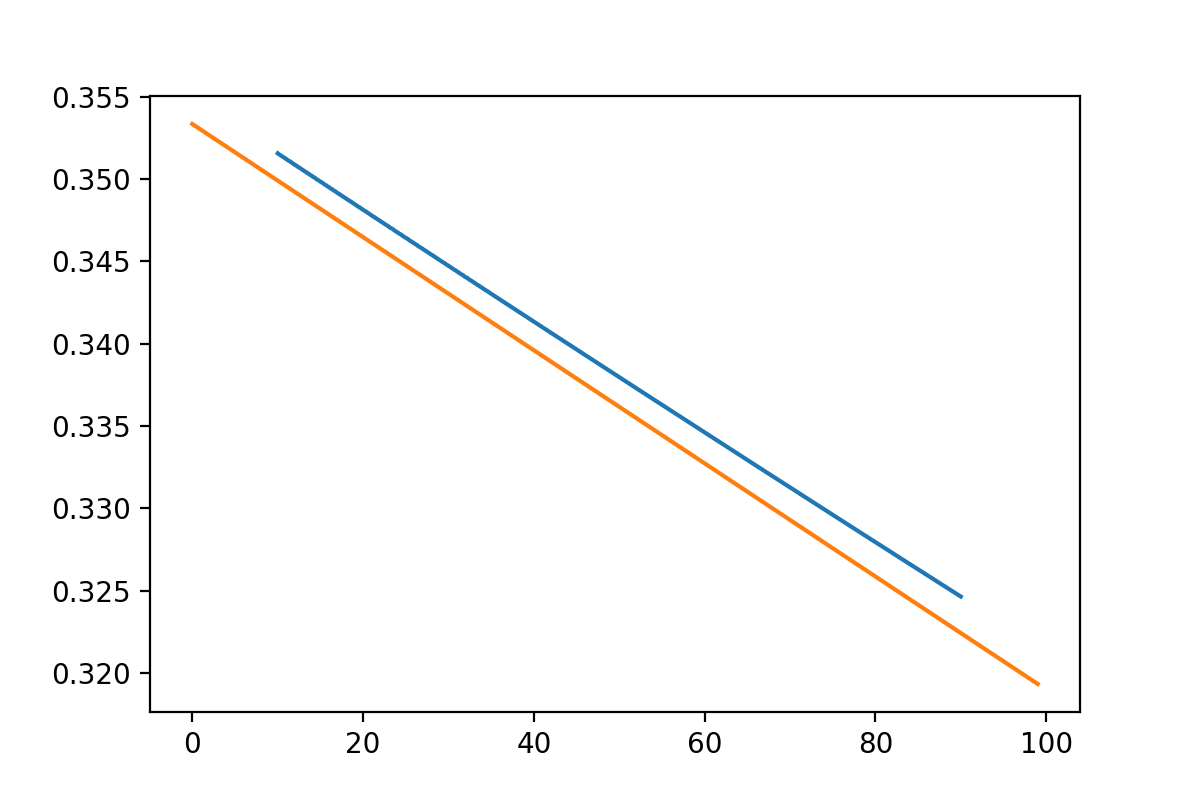

In [17]:
%matplotlib notebook
# plot
figwidth       = 6
figheight      = 4
lineWidth      = 3
textFontSize   = 10
gcafontSize    = 10
markerSize     = 3
# figure_folder = "./"
fig = plt.figure(1, figsize=(figwidth,figheight))
fig.tight_layout()
plt.plot(iix[100:-100], k[100:-100], '-') 
plt.plot(xnew, k_theo, '-') 
# plt.ylim(0.28, 0.4)

In [21]:
(k_theo[20]-k[200])/k[200]

-0.0047518918051731515